<img src='https://encrypted-tbn0.gstatic.com/images?q=tbn%3AANd9GcQ-VfNtOyJbsaxu43Kztf_cv1mgBG6ZIQZEVw&usqp=CAU'>

# Procesamiento de Lenguage Natural

## Taller #11: Análisis de sentimiento
`Fecha de entrega: Noviembre 21, 2020 (Antes del inicio de la próxima clase).`

`Modo de entrega: Subir link de GitHub al aula virtual.`

###  `[25 pts]` Punto 1: Hacer análisis de sentimiento de los datos del anterior taller
- Columna con el puntaje numérico del sentimiento
- Pueden usar cualquiera de las librerias vistas en clase

In [356]:
import pandas as pd
import tweepy

In [357]:
keys = pd.read_csv("llaves_twitter.csv", header=None)
keys = dict(zip(keys[0],keys[1]))

In [358]:
# Autorizar a través API
auth = tweepy.OAuthHandler(keys['API_key'], keys['API_secret_key'])
auth.set_access_token(keys['Access_token'], keys['Access_token_secret'])
api = tweepy.API(auth, wait_on_rate_limit=True)

In [359]:
# Autorizar a través API
auth = tweepy.OAuthHandler(keys['API_key'], keys['API_secret_key'])
auth.set_access_token(keys['Access_token'], keys['Access_token_secret'])
api = tweepy.API(auth, wait_on_rate_limit=True) # wait_on_rate_limit=True este paramtero es para dar una pausa en 
                                                #la recolección de la información

In [360]:
tweets = tweepy.Cursor(api.search,
                       q=['futbol -RT'], #RT es para que no coloque los rtuit
                       lang='es',
                       geocode=f'4.0000000,-72.0000000,45mi',  #latitud y longitud y millas a la redonda
                       tweet_mode='extended', #que tome todo el texto del tweet
                       include_rts=False).items(100)


In [361]:
t1 = []

for tweet in tweets:
    temp1 = []
    temp1.append(tweet.full_text)
    
    t1.append(temp1)

In [362]:
data = pd.DataFrame(t1)
data.columns = ['tweet']
data.head() 
                 

,tweet
0,@FRAU_KOMISCH @DannielDel También en el futbol...
1,@Roxadita Hola bonita soy de Colombia te felic...
2,@BARCEANTON @Roxadita Soy de Colombia la felic...
3,El fútbol es un juego de 11 vs 11 y que siempr...
4,"Al parecer, esa frase no sería mufa solamente ..."


In [363]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

vader = SentimentIntensityAnalyzer()

def pre_procesado(texto):
    texto  = vader.polarity_scores(texto)['compound']
    return texto

In [364]:
data['Puntaje_Senti1'] = data['tweet'].apply(lambda texto: pre_procesado(texto))
data

,tweet,Puntaje_Senti1
0,@FRAU_KOMISCH @DannielDel También en el futbol...,0.0000
1,@Roxadita Hola bonita soy de Colombia te felic...,0.4033
2,@BARCEANTON @Roxadita Soy de Colombia la felic...,0.0000
3,El fútbol es un juego de 11 vs 11 y que siempr...,0.0000
4,"Al parecer, esa frase no sería mufa solamente ...",-0.2960
5,qué hacéis que no estáis animando al Futbol Cl...,-0.2960
6,Futbol Club Morfelona,0.0000
7,@franciscoveli12 No entiendo eso de hacer asad...,-0.3595


In [367]:
from googletrans import Translator
import pandas as pd 

translator = Translator()
data['ing'] = data['tweet'].apply(lambda valor: translator.translate(valor, src='es', dest='en'))
#data

In [368]:
data['ingles'] = data['ing'].apply(lambda valor: valor.text)
data.head()

,tweet,Puntaje_Senti1,ing,ingles
0,@FRAU_KOMISCH @DannielDel También en el futbol...,0.0000,"Translated(src=es, dest=en, text=@FRAU_KOMISCH...",@FRAU_KOMISCH @DannielDel Also in football he ...
1,@Roxadita Hola bonita soy de Colombia te felic...,0.4033,"Translated(src=es, dest=en, text=@Roxadita Hel...","@Roxadita Hello, beautiful, I'm from Colombia,..."
2,@BARCEANTON @Roxadita Soy de Colombia la felic...,0.0000,"Translated(src=es, dest=en, text=@BARCEANTON @...","@BARCEANTON @Roxadita I am from Colombia, I co..."
3,El fútbol es un juego de 11 vs 11 y que siempr...,0.0000,"Translated(src=es, dest=en, text=Soccer is an ...",Soccer is an 11 vs 11 game and the Germans alw...
4,"Al parecer, esa frase no sería mufa solamente ...",-0.2960,"Translated(src=es, dest=en, text=Apparently, t...","Apparently, that phrase would not be mufa only..."


In [370]:
data['sentimiento'] = data['ingles'].apply(lambda valor: vader.polarity_scores(valor)['compound'])
data.head()

,tweet,Puntaje_Senti1,ing,ingles,sentimiento
0,@FRAU_KOMISCH @DannielDel También en el futbol...,0.0000,"Translated(src=es, dest=en, text=@FRAU_KOMISCH...",@FRAU_KOMISCH @DannielDel Also in football he ...,0.0000
1,@Roxadita Hola bonita soy de Colombia te felic...,0.4033,"Translated(src=es, dest=en, text=@Roxadita Hel...","@Roxadita Hello, beautiful, I'm from Colombia,...",0.9143
2,@BARCEANTON @Roxadita Soy de Colombia la felic...,0.0000,"Translated(src=es, dest=en, text=@BARCEANTON @...","@BARCEANTON @Roxadita I am from Colombia, I co...",0.9081
3,El fútbol es un juego de 11 vs 11 y que siempr...,0.0000,"Translated(src=es, dest=en, text=Soccer is an ...",Soccer is an 11 vs 11 game and the Germans alw...,0.5859
4,"Al parecer, esa frase no sería mufa solamente ...",-0.2960,"Translated(src=es, dest=en, text=Apparently, t...","Apparently, that phrase would not be mufa only...",0.0000


###  `[10 pts]` Punto 2: ¿Cuál es el tuit más positivo y más negativo?

In [371]:
data[['tweet', 'sentimiento']].sort_values('sentimiento',ascending=True)

,tweet,sentimiento
5,qué hacéis que no estáis animando al Futbol Cl...,-0.4023
0,@FRAU_KOMISCH @DannielDel También en el futbol...,0.0000
4,"Al parecer, esa frase no sería mufa solamente ...",0.0000
6,Futbol Club Morfelona,0.0000
7,@franciscoveli12 No entiendo eso de hacer asad...,0.0000
3,El fútbol es un juego de 11 vs 11 y que siempr...,0.5859
2,@BARCEANTON @Roxadita Soy de Colombia la felic...,0.9081
1,@Roxadita Hola bonita soy de Colombia te felic...,0.9143


In [276]:
#El tuit más negativo tiene el valor de -0.4023

In [372]:
data[['tweet', 'sentimiento']].sort_values('sentimiento',ascending=False)

,tweet,sentimiento
1,@Roxadita Hola bonita soy de Colombia te felic...,0.9143
2,@BARCEANTON @Roxadita Soy de Colombia la felic...,0.9081
3,El fútbol es un juego de 11 vs 11 y que siempr...,0.5859
0,@FRAU_KOMISCH @DannielDel También en el futbol...,0.0000
4,"Al parecer, esa frase no sería mufa solamente ...",0.0000
6,Futbol Club Morfelona,0.0000
7,@franciscoveli12 No entiendo eso de hacer asad...,0.0000
5,qué hacéis que no estáis animando al Futbol Cl...,-0.4023


In [278]:
#El tuit más positivo tiene el valor de 0.9143

###  `[15 pts]` Punto 3: ¿Cuántos tuits positivos/negativos hay en sus datos?

In [373]:
def pre_procesado(texto):
    if texto > 0:
        senti = 'POSITIVE'
        #return senti
    if texto < 0:
        senti = 'NEGATIVE' 
        #return senti
    if texto == 0:
        senti = 'NEUTRO' 
    return senti    


In [374]:
data['sent_palabra'] = data['sentimiento'].apply(lambda texto: pre_procesado(texto))
data

,tweet,Puntaje_Senti1,ing,ingles,sentimiento,sent_palabra
0,@FRAU_KOMISCH @DannielDel También en el futbol...,0.0000,"Translated(src=es, dest=en, text=@FRAU_KOMISCH...",@FRAU_KOMISCH @DannielDel Also in football he ...,0.0000,NEUTRO
1,@Roxadita Hola bonita soy de Colombia te felic...,0.4033,"Translated(src=es, dest=en, text=@Roxadita Hel...","@Roxadita Hello, beautiful, I'm from Colombia,...",0.9143,POSITIVE
2,@BARCEANTON @Roxadita Soy de Colombia la felic...,0.0000,"Translated(src=es, dest=en, text=@BARCEANTON @...","@BARCEANTON @Roxadita I am from Colombia, I co...",0.9081,POSITIVE
3,El fútbol es un juego de 11 vs 11 y que siempr...,0.0000,"Translated(src=es, dest=en, text=Soccer is an ...",Soccer is an 11 vs 11 game and the Germans alw...,0.5859,POSITIVE
4,"Al parecer, esa frase no sería mufa solamente ...",-0.2960,"Translated(src=es, dest=en, text=Apparently, t...","Apparently, that phrase would not be mufa only...",0.0000,NEUTRO
5,qué hacéis que no estáis animando al Futbol Cl...,-0.2960,"Translated(src=es, dest=en, text=what are you ...",what are you doing that you are not cheering o...,-0.4023,NEGATIVE
6,Futbol Club Morfelona,0.0000,"Translated(src=es, dest=en, text=Morfelona Soc...",Morfelona Soccer Club,0.0000,NEUTRO
7,@franciscoveli12 No entiendo eso de hacer asad...,-0.3595,"Translated(src=es, dest=en, text=@ franciscove...",@ franciscoveli12 I don't understand making ba...,0.0000,NEUTRO


In [375]:
cant_senti = pd.DataFrame(data.sent_palabra.value_counts()).reset_index()
cant_senti.columns = ['sent_palabra', 'cnt']
cant_senti = cant_senti.sort_values('cnt')
cant_senti

,sent_palabra,cnt
2,NEGATIVE,1
1,POSITIVE,3
0,NEUTRO,4


In [ ]:
#Positivos hay 3, negativos 1 y neutros 4

###  `[BONUS 5pts]` : Diagrama de barras de la pregunta 3

###  `[BONUS 7pts]` : Nubes de palabras por sentimiento

In [376]:
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

trace = go.Bar(x=cant_senti.sent_palabra.values[:15],
               y=cant_senti.cnt.values[:15])

layout = go.Layout(title='Cantidad Sentimientos')

fig = go.Figure(data=[trace], layout=layout)
iplot(fig)

In [377]:
#Nube
import numpy as np

from wordcloud import WordCloud
from wordcloud import ImageColorGenerator

from nltk.corpus import stopwords
stopwords = stopwords.words('spanish')

import matplotlib.pyplot as plt
import PIL.Image
from IPython.display import display

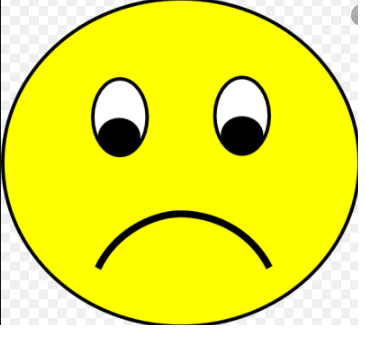

In [378]:
negativo = PIL.Image.open("imagen_negativo.png")

display(negativo)

In [379]:
mask_negative  = np.array(negativo)

In [380]:
t2 = []

def text_clean(row):
    temp2 = []
    text = row['tweet']
    text1 = row['sent_palabra']
    if text1 == 'NEGATIVE':
        temp2.append(text)
    
    t2.append(temp2)
    
data[['tweet']] = data.apply(text_clean, axis=1, result_type='expand')


In [381]:
negative = pd.DataFrame(t2)
negative.columns = ['tweet']
#negative

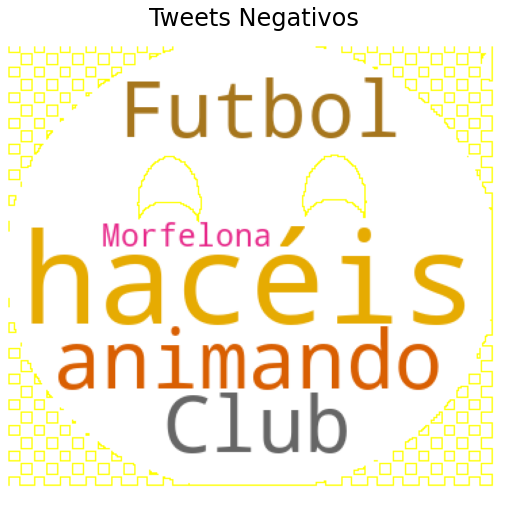

In [382]:
palabras = negative.tweet.str.cat(sep=',')

wordcloud = WordCloud(width=500, height=200,
                     max_font_size=150, max_words=250,
                     background_color='white', colormap='Dark2',
                     stopwords=stopwords,
                     mask=mask_negative, contour_width=0.5, contour_color='yellow').generate(palabras)

plt.figure(figsize=(10,8))
plt.imshow(wordcloud, interpolation='hamming')
plt.axis("off")
plt.tight_layout(pad=5)
plt.suptitle('Tweets Negativos',fontsize=24)  
plt.show()

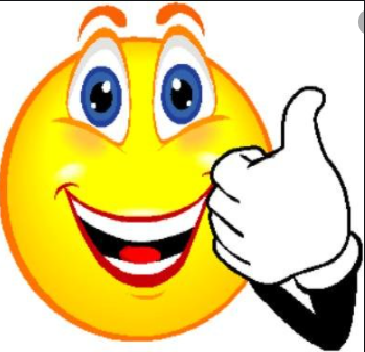

In [388]:
positivo = PIL.Image.open("imagen_positivo.png")

display(positivo)

In [391]:
data = pd.DataFrame(t1)
data.columns = ['tweet']
translator = Translator()
data['ing'] = data['tweet'].apply(lambda valor: translator.translate(valor, src='es', dest='en'))
data['ingles'] = data['ing'].apply(lambda valor: valor.text)
data['sentimiento'] = data['ingles'].apply(lambda valor: vader.polarity_scores(valor)['compound'])
data['sent_palabra'] = data['sentimiento'].apply(lambda texto: pre_procesado(texto))
#data.head() 

In [392]:
mask_positive  = np.array(positivo)

In [393]:
t3 = []

def text_clean1(row):
    temp3 = []
    text2 = row['tweet']
    text3 = row['sent_palabra']
    if text3 == 'POSITIVE':
        temp3.append(text2)
    
    t3.append(temp3)
    
data[['tweet']] = data.apply(text_clean1, axis=1, result_type='expand')

In [394]:
positive = pd.DataFrame(t3)
positive.columns = ['tweet']
#positive

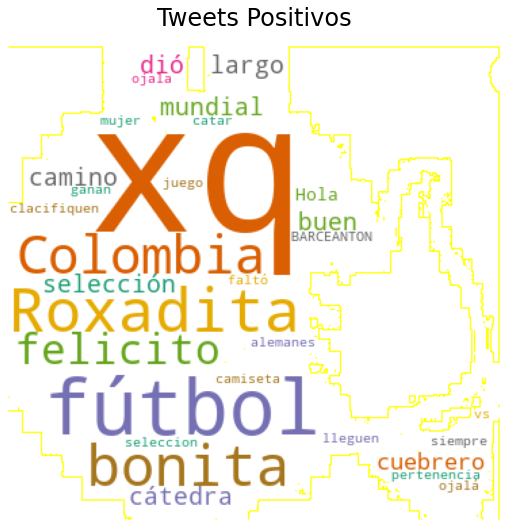

In [395]:
palabras1 = positive.tweet.str.cat(sep=',')

wordcloud = WordCloud(width=500, height=200,
                     max_font_size=150, max_words=250,
                     background_color='white', colormap='Dark2',
                     stopwords=stopwords,
                     mask=mask_positive, contour_width=0.5, contour_color='yellow').generate(palabras1)

plt.figure(figsize=(10,8))
plt.imshow(wordcloud, interpolation='hamming')
plt.axis("off")
plt.tight_layout(pad=5)
plt.suptitle('Tweets Positivos',fontsize=24)  
plt.show()

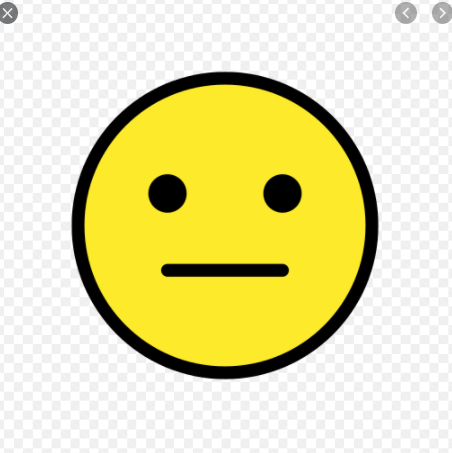

In [396]:
neutro = PIL.Image.open("imagen_neutros.png")

display(neutro)

In [397]:
data = pd.DataFrame(t1)
data.columns = ['tweet']
translator = Translator()
data['ing'] = data['tweet'].apply(lambda valor: translator.translate(valor, src='es', dest='en'))
data['ingles'] = data['ing'].apply(lambda valor: valor.text)
data['sentimiento'] = data['ingles'].apply(lambda valor: vader.polarity_scores(valor)['compound'])
data['sent_palabra'] = data['sentimiento'].apply(lambda texto: pre_procesado(texto))
#data.head() 

In [398]:
mask_neutro  = np.array(neutro)

In [399]:
t4 = []

def text_clean1(row):
    temp4 = []
    text4 = row['tweet']
    text5 = row['sent_palabra']
    if text5 == 'NEUTRO':
        temp4.append(text4)
    
    t4.append(temp4)
    
data[['tweet']] = data.apply(text_clean1, axis=1, result_type='expand')

In [400]:
neutro = pd.DataFrame(t4)
neutro.columns = ['tweet']

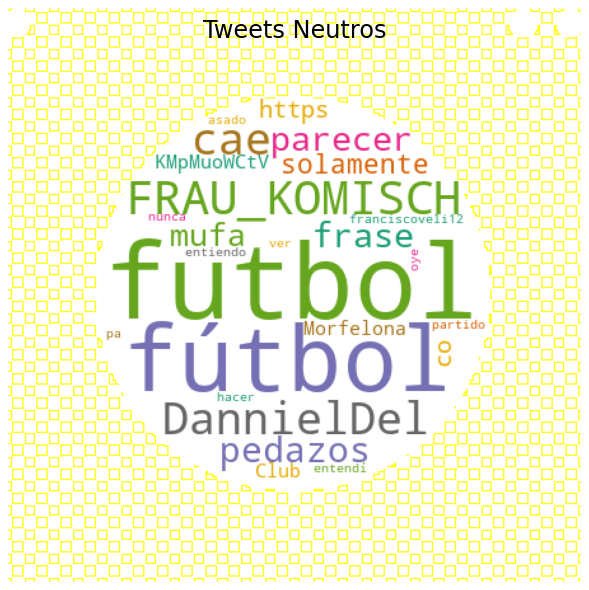

In [401]:
palabras2 = neutro.tweet.str.cat(sep=',')

wordcloud = WordCloud(width=500, height=200,
                     max_font_size=150, max_words=250,
                     background_color='white', colormap='Dark2',
                     stopwords=stopwords,
                     mask=mask_neutro, contour_width=0.5, contour_color='yellow').generate(palabras2)

plt.figure(figsize=(10,8))
plt.imshow(wordcloud, interpolation='hamming')
plt.axis("off")
plt.tight_layout(pad=0)
plt.suptitle('Tweets Neutros',fontsize=24)  
plt.show()